In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import datetime

In [2]:
# load dataset

df = pd.read_csv("food_orders_new_delhi.csv")

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
df.shape

(1000, 12)

In [5]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [7]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

## HANDLING MISSING VALUES

In [8]:
# loop through columns, sort out negative and missing values 

for col in df.columns:
    if col == 'Discounts and Offers':  
        # Replace None or NaN values in Discounts and Offers with No Discount
        df[col].replace([None, np.nan], "No Discount", inplace=True)
    elif pd.api.types.is_numeric_dtype(df[col]):
        # Replace all negative values with zero
        df[col].clip(lower=0, inplace=True)
        # Replace all missing values (NaN) with mean
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        # Replace any other missing values (NaN) with mode
        df[col].fillna(df[col].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [9]:
df.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


### In the context of this dataset, visualizing the full range of data, including outliers, provides a more accurate picture of the situation for analysis. So therefore, in order to preserve the integrity of the dataset, i will not be handling/resolving Outliers.

###  Since a possible skewed data/column in this dataset(eg. Refunds/Chargebacks) could reflect important real-world characteristics or phenomenon, i will not be resolving skewness for this data set as this might obscure important insights.

## COST ANALYSIS

### For the cost analysis, we shall consider the following costs associated with each order:

### Delivery Fee: The fee charged for delivering the order.
### Payment Processing Fee: The fee for processing the payment.
### Discount Value: The discount provided on the order.

### To calculate the total cost per order, I shall add Delivery Fee, Payment Processing Fee and Refunds/Chargebacks together. This will give us an overall understanding of the cost structure.

### The revenue the food delivery gets from each order is mainly derived from the Commission Fee minus the Discount Value. 

### I shall then calculate the net profit by subtracting the Total costs from the Revenue generated.

In [10]:
# To get the discount value of each order, we first convert Discount and offers to decimal and multiply it by the Order Value

# Extract numerical value from 'Discounts and Offers' and convert to decimal
df['Discounts and Offers(decimal)'] = df['Discounts and Offers'].str.extract(r'(\d+)').astype(float) / 100

# Calculate the Discount Value
df['Discount Value'] = df['Order Value'] * df['Discounts and Offers(decimal)']

df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounts and Offers(decimal),Discount Value
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,27,0,NaN,NaN
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0.50,996.00


In [11]:
# Rearrange columns

columns_order = ['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time', 'Delivery Date and Time','Order Value', 'Delivery Fee', 'Payment Method', 'Discounts and Offers', 'Discounts and Offers(decimal)', 'Discount Value']

# Filter out the columns not in columns_order and concatenate them to column_order 
columns_order += [col for col in df.columns if col not in columns_order]
df = df[columns_order]


df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Discounts and Offers(decimal),Discount Value,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,0.05,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,0.10,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,0.15,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,NaN,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,0.50,996.00,130,50,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order ID                       1000 non-null   int64  
 1   Customer ID                    1000 non-null   object 
 2   Restaurant ID                  1000 non-null   object 
 3   Order Date and Time            1000 non-null   object 
 4   Delivery Date and Time         1000 non-null   object 
 5   Order Value                    1000 non-null   int64  
 6   Delivery Fee                   1000 non-null   int64  
 7   Payment Method                 1000 non-null   object 
 8   Discounts and Offers           1000 non-null   object 
 9   Discounts and Offers(decimal)  815 non-null    float64
 10  Discount Value                 815 non-null    float64
 11  Commission Fee                 1000 non-null   int64  
 12  Payment Processing Fee         1000 non-null   in

In [13]:
# Replace missing values in Discounts and Offers, Discounts Value

for col in df.columns:
    # Replace all missing values (NaN) with mean
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].replace([None, np.nan], 0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order ID                       1000 non-null   int64  
 1   Customer ID                    1000 non-null   object 
 2   Restaurant ID                  1000 non-null   object 
 3   Order Date and Time            1000 non-null   object 
 4   Delivery Date and Time         1000 non-null   object 
 5   Order Value                    1000 non-null   int64  
 6   Delivery Fee                   1000 non-null   int64  
 7   Payment Method                 1000 non-null   object 
 8   Discounts and Offers           1000 non-null   object 
 9   Discounts and Offers(decimal)  1000 non-null   float64
 10  Discount Value                 1000 non-null   float64
 11  Commission Fee                 1000 non-null   int64  
 12  Payment Processing Fee         1000 non-null   in

In [14]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Discounts and Offers(decimal),Discount Value,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,0.05,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,0.10,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,0.15,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,0.00,0.00,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,0.50,996.00,130,50,0


In [15]:
# Add Delivery Fee, Payment Processing Fee and Refunds/Chargebacks together to get Total Cost
df['Total Cost'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Refunds/Chargebacks']

# Total Revenue generated
df['Total Revenue'] = df['Commission Fee'] - df['Discount Value']

# Subtract Total Revenue from Total Cost to get Profit made
df['Profit'] = df['Total Revenue'] - df['Total Cost']

In [16]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Discounts and Offers(decimal),Discount Value,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Total Cost,Total Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,0.05,95.70,150,47,0,47,54.30,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,0.10,98.60,198,23,0,63,99.40,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,0.15,140.55,195,45,0,75,54.45,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,0.00,0.00,146,27,0,77,146.00,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,0.50,996.00,130,50,0,80,-866.00,-946.00


### DELIVERY COST AND PROFITABILITY

In [17]:
# Get the total of the Key Features

total_orders = df.shape[0]
total_revenue = df['Total Revenue'].sum()
total_cost = df['Total Cost'].sum()
total_profit = df['Profit'].sum()

# store in a dictionary

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Cost": total_cost,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': -47267.85, 'Total Cost': 86752, 'Total Profit': -134019.85}


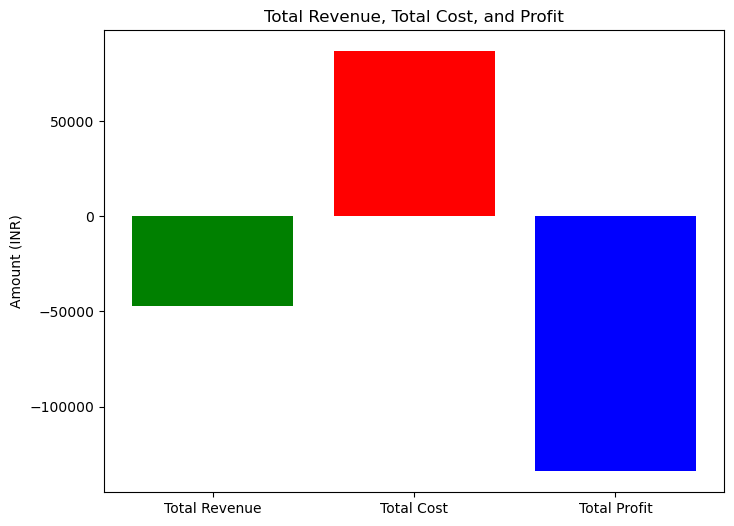

In [18]:
# Visualization using bar plot

totals = ['Total Revenue', 'Total Cost', 'Total Profit']
values = [total_revenue, total_cost, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Total Cost, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

### OBSERVATION

### From the bar plot and the analysis carried out on the dataset, we can see that the total cost or you can say the total amount of money used in carrying/ delivering each order is very HIGH compared to the total revenue which they get for each order. The consequence of this discovery is reflected on the total profit made by the company. Due to very poor total revenue generated, the delivery company is currently making HUGE loss in its over all profit. We shall use the pie chart to gain more insight as to what factor or feature must have lead to this loss of profit. 

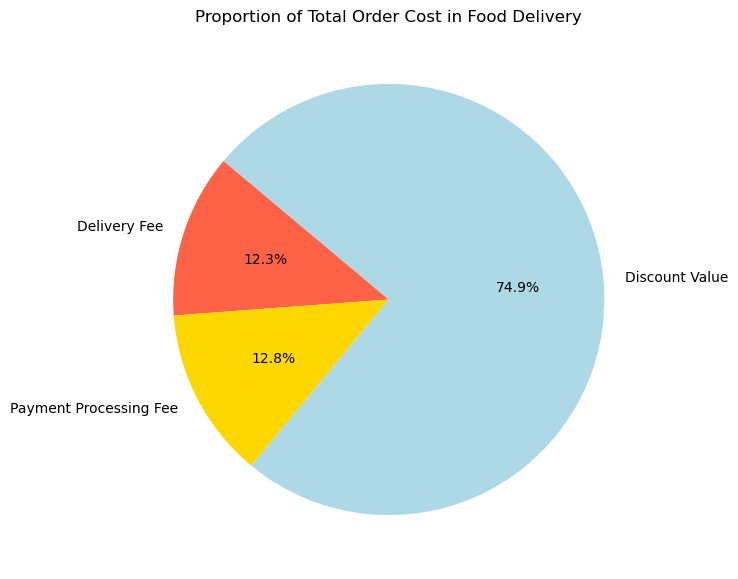

In [19]:
# Visualization using pie chart

costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Value']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Order Cost in Food Delivery')
plt.show()

### FURTHER OBSERVATIONS AND INSIGHTS

### From the pie chat displayed above, we can seee that the main reason why the delivery company is making a HUGE loss is due to discounts and offers (over 73%). Not enough information was given as to why there are so many different type of discounts, but one thing we can say for sure is that the high percentage in discounts have affected the total profit made by the delivery company NEGATIVELY.

### EFFECT OF THE CURRENT SITUATION IN THE NEAREST FUTURE

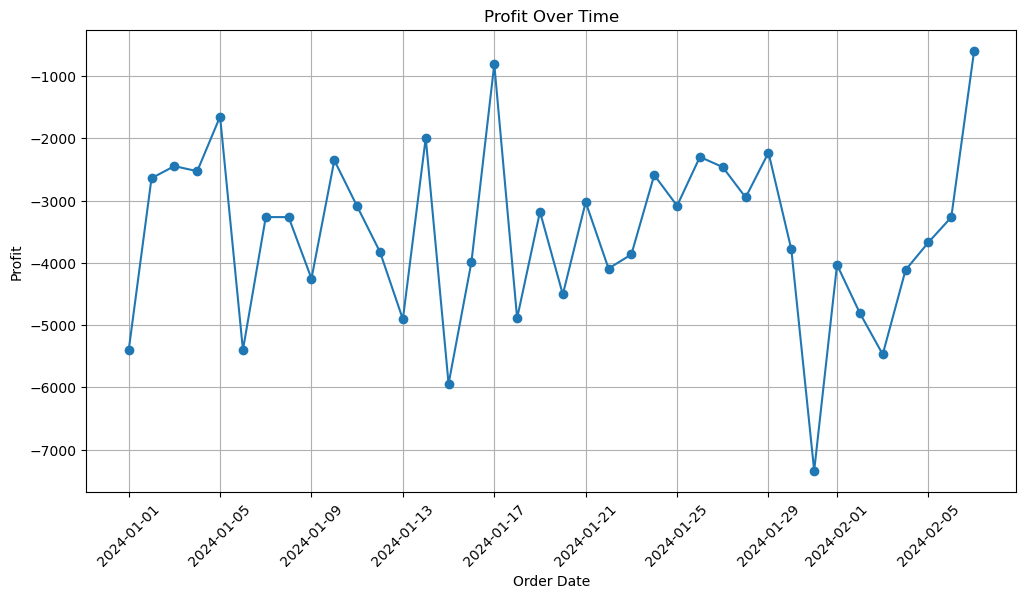

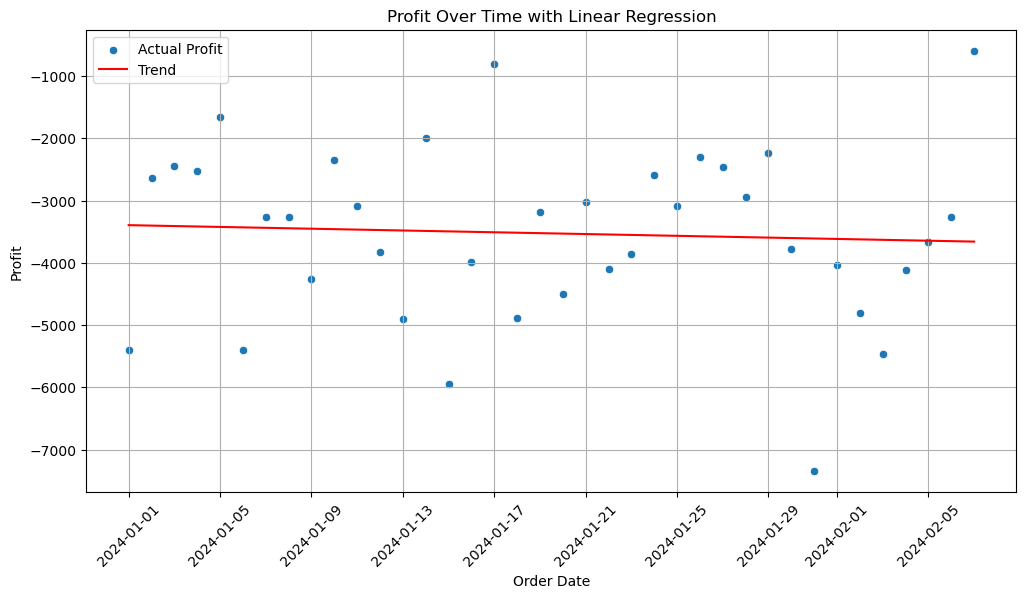

In [20]:
# converting the Order Date and Time and Delivery Date and Time columns to datetime format

df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

# Extract only Date from Order Date and Time Column
df['Order Date'] = df['Order Date and Time'].dt.date

# group data by Order Date and calculate the sum of Profit for each date. 
profit_by_date = df.groupby('Order Date')['Profit'].sum().reset_index()

# Visualize profit with current data
plt.figure(figsize=(12, 6))
plt.plot(profit_by_date['Order Date'], profit_by_date['Profit'], marker='o', linestyle='-')
plt.title('Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# convert to numerical data for regression analysis purposes
profit_by_date['Numeric Date'] = profit_by_date['Order Date'].apply(lambda x: x.toordinal())

# create model that explains the trend or consequences of the currnet situation if significant changes are not made
regression_model = LinearRegression()
regression_model.fit(profit_by_date[['Numeric Date']], profit_by_date['Profit'])

predicted_profits = regression_model.predict(profit_by_date[['Numeric Date']])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=profit_by_date, x='Order Date', y='Profit', label='Actual Profit')
plt.plot(profit_by_date['Order Date'], predicted_profits, color='red', label='Trend')
plt.title('Profit Over Time with Linear Regression')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### We can safely say that if the current situation of this delivery company remains the same based on the information from the dataset, the company will most certainly incure more losses in the future. Drastic decisions have to be made in order to improve the situation of the company positively in terms of generating revenue and making profit.

## RECOMMENDATIONS TO IMPROVE PROFIT 

### To improve profitability, there are several approaches in which the delivery company can apply. Some of these approaches include:


### Increase Commission Fees: If the company increases its commission fee from restaurants, this could directly boost profits.

### Reduce Delivery Fees: Negotiating better rates with delivery providers or optimizing delivery routes to reduce costs.

### Reduce Payment Processing Fees: Partnering with payment processors to lower transaction fees.

### Limit Discounts and Offers: Reducing the amount or frequency of discounts can help increase revenue.

### Optimize Delivery Timing: Analyzing order timing to ensure that deliveries are made during less expensive periods.

In [21]:
# Save cleaned csv

df.to_csv('Cleaned_food_orders_new_delhi.csv', index = False)

## PROFIT GAIN IMPLEMENTATION STRATEGY

### I will be implementing the Increase Commission Fees and  the Limit Discounts and Offers method to improve the profit of the delivery company.The Commission Fees will be increased by 20 INR. For Limiting Discounts, a customer can only get a discount on their order if the order value is above 800 INR

In [22]:
# Implementing changes to improve profitability

# Increase commission fee by a fixed amount (e.g., 20 INR)
increase_amount = 20
df['Commission Fee'] = df['Commission Fee'] + increase_amount

# Reducing the impact of Discounts and Offers
# Cap the discounts at 5% (more aggressive) to ensure no discount exceeds 5%
df['Discounts and Offers(decimal)'] = df['Discounts and Offers(decimal)'].clip(upper=0.05)

# Introduce a minimum order value for discounts (e.g., only apply discounts for orders above 800 INR)
min_order_value_for_discount = 800
df['Discounts and Offers(decimal)'] = df.apply(
    lambda x: x['Discounts and Offers(decimal)'] if x['Order Value'] > min_order_value_for_discount else 0,
    axis=1
)

# Recalculate Discount Value and Total Cost
df['Discount Value'] = df['Order Value'] * df['Discounts and Offers(decimal)']
df['Total Revenue'] = df['Commission Fee'] - df['Discount Value'] 

# Recalculate Profit
df['Profit'] = df['Total Revenue'] - df['Total Cost']



# Recalculate overall metrics after changes
total_orders = df.shape[0]
total_revenue = df['Total Revenue'].sum()
total_cost = df['Total Cost'].sum()
total_profit = df['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Cost": total_cost,
    "Total Profit": total_profit
}

print("Overall Metrics After Aggressive Discount Changes:", overall_metrics)

Overall Metrics After Aggressive Discount Changes: {'Total Orders': 1000, 'Total Revenue': 110326.85, 'Total Cost': 86752, 'Total Profit': 23574.85}


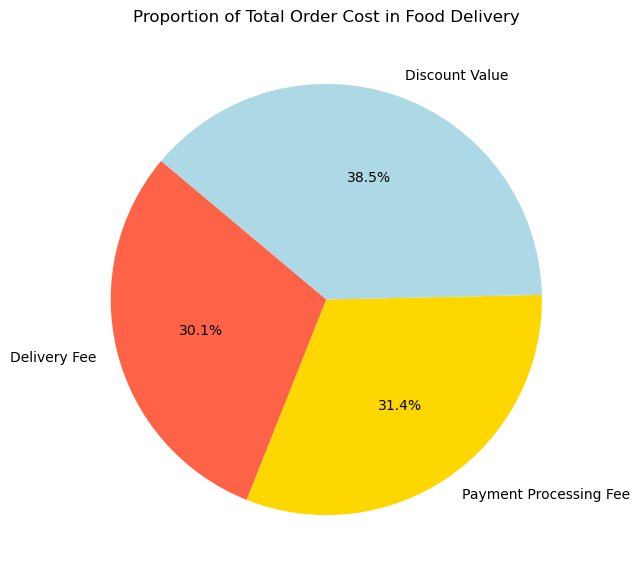

In [23]:
# visualize pie chat

costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Value']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Order Cost in Food Delivery')
plt.show()

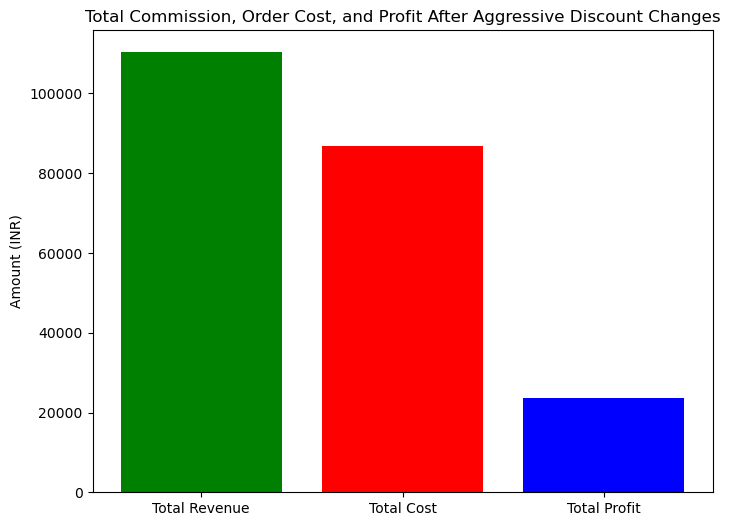

In [24]:
# Plotting the new metrics

totals = ['Total Revenue', 'Total Cost', 'Total Profit']
values = [total_revenue, total_cost, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Commission, Order Cost, and Profit After Aggressive Discount Changes')
plt.ylabel('Amount (INR)')
plt.show()

### We see now that by introducing a minimum order value for discounts and increasing the commission fees will automatically increase the total revenue generated by the delivery company. This will eventually lead to a rise in the total profits made by the company.

In [25]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Discounts and Offers(decimal),Discount Value,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Total Cost,Total Revenue,Profit,Order Date
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,0.05,95.70,170,47,0,47,74.30,27.30,2024-02-01
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,0.05,49.30,218,23,0,63,168.70,105.70,2024-02-02
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,0.05,46.85,215,45,0,75,168.15,93.15,2024-01-31
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,0.00,0.00,166,27,0,77,166.00,89.00,2024-01-16
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,0.05,99.60,150,50,0,80,50.40,-29.60,2024-01-29


### EFFECT OF THE PROFIT GAIN IMPLEMENTAION STRATEGY NIN THE NEAREST FUTURE

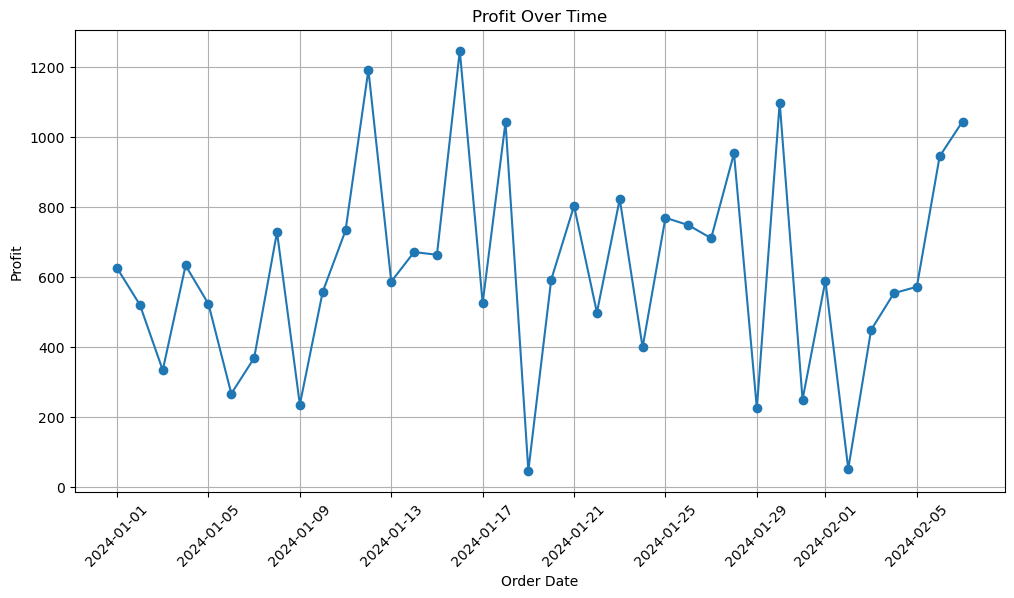

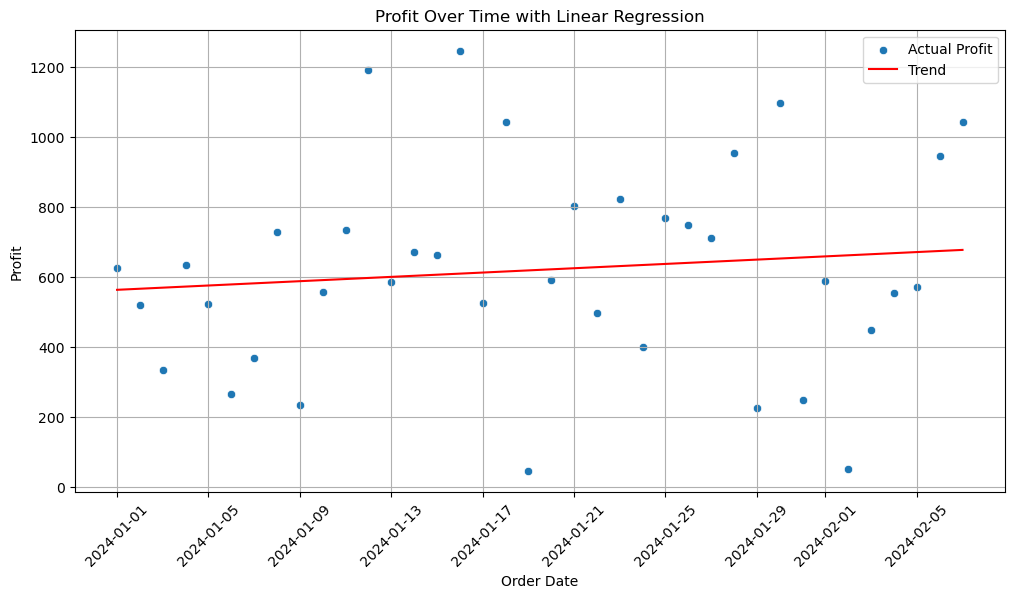

In [26]:
# convert Order Date to datetime format
df['Order Date'] = df['Order Date and Time'].dt.date

# group data by Order Date and calculate the sum of Profit for each date. 
profit_by_date = df.groupby('Order Date')['Profit'].sum().reset_index()

# Visualize profit with current data
plt.figure(figsize=(12, 6))
plt.plot(profit_by_date['Order Date'], profit_by_date['Profit'], marker='o', linestyle='-')
plt.title('Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# convert to numerical data for regression analysis purposes
profit_by_date['Numeric Date'] = profit_by_date['Order Date'].apply(lambda x: x.toordinal())

# create model that explains the trend or consequences of the currnet situation if significant changes are not made
regression_model = LinearRegression()
regression_model.fit(profit_by_date[['Numeric Date']], profit_by_date['Profit'])

predicted_profits = regression_model.predict(profit_by_date[['Numeric Date']])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=profit_by_date, x='Order Date', y='Profit', label='Actual Profit')
plt.plot(profit_by_date['Order Date'], predicted_profits, color='red', label='Trend')
plt.title('Profit Over Time with Linear Regression')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## OBSERVATION AND CONCLUSION

### We can see that by increasing the Commission Fees and Limiting the Discount offers, the delivery company's profit will continue to grow and rise in the nearest future. 